# Support Vector Machines Project

## Fraud in Wine

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.


## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*


*The overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features:**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**A countplot that displays the count per category of Legit vs Fraud which we see is inbalanced:**

<Axes: xlabel='quality', ylabel='count'>

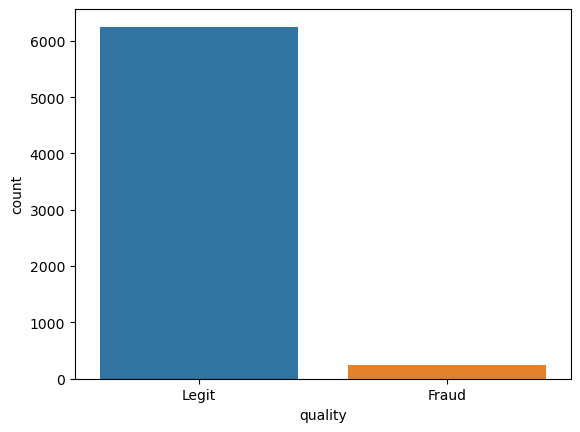

In [5]:
sns.countplot(data = df, x= 'quality')

<Axes: xlabel='type', ylabel='count'>

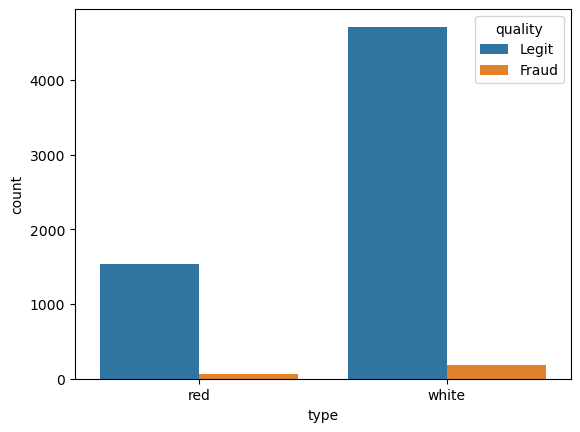

In [6]:
sns.countplot(data = df, x = 'type', hue = 'quality')

**The percentage of red and white wines that are fraud:**

In [7]:
100*len(df[(df['type']=='red') & (df['quality']=='Fraud')])/len(df[df['type']=='red'])
        


3.9399624765478425

In [8]:
100*len(df[(df['type']=='white') & (df['quality']=='Fraud')])/len(df[df['type']=='white'])
        

3.736218864842793

**Calculating the correlation between the various features and the "quality" column:**

In [9]:
df['Fraud']= df['quality'].map({'Legit':0, 'Fraud':1})

In [10]:
cor = df.corr()['Fraud'][:-1].sort_values()

/var/folders/_y/kz5jk2zn3031sxh_gjb5jsdm0000gn/T/ipykernel_77249/3171669957.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()['Fraud'][:-1].sort_values()


**Creating a bar plot of the correlation values to Fraudlent wine:**

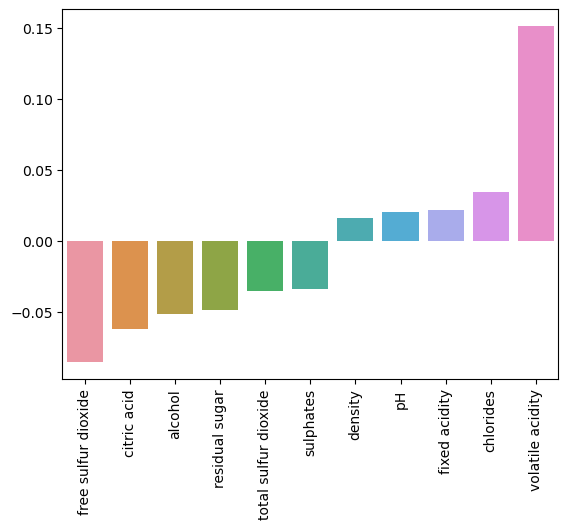

In [11]:
sns.barplot(x = cor.index, y = cor.values)
plt.xticks(rotation= 90);


## Machine Learning Model


In [12]:
df = df.drop('Fraud',axis=1)

In [18]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [19]:
X = df.drop('quality',axis=1)
y = df['quality']

**Performing a Train|Test split on the data, with a 10% test size:**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Scaling the X train and X test data:**

In [16]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale = StandardScaler()
scale_X_train = scale.fit_transform(X_train)
scale_X_test = scale.transform(X_test)

In [23]:
from sklearn.svm import SVC

In [24]:
svc = SVC(class_weight='balanced')

**A GridSearchCV to run a grid search for the best C and gamma parameters:**

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [27]:
grid.fit(scale_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [28]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

**The confusion matrix and classification report for your model:**

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
cv_pred = grid.predict(scale_X_test)

In [31]:
confusion_matrix(y_test, cv_pred)

array([[ 17,  10],
       [ 92, 531]])

In [32]:
print(classification_report(y_test,cv_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

